<img src='./img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>


<br> <a href="./4_SRAL_SLAs.ipynb"><< 4 - SRAL Sea-level anomalies </a><span style="float:right;"><a href="SRAL_overview.ipynb">Back to SRAL overview >></a> 
    

## First look at altimetry waveforms for two different satellites ##

As part of Copernicus, EUMETSAT operates the SRAL altimeter on Sentinel-3 and the Jason-3 altimeter. Here we will look at the waveforms provided by both sensors.

Waveforms are the fundamental signal that altimeters receive, and from which they derive all their information about the ocean surface. The shape of a waveform is determined by how a radar pulse interacts with the Earth's surface. Much more information on waveforms can be found here:

http://www.altimetry.info/radar-altimetry-tutorial/how-altimetry-works/from-radar-pulse-to-altimetry-measurements/

In [1]:
import os
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.lines as mlines
from matplotlib import dates

In [2]:
#we will look at the plot within the notebooks
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,10)
plt.ioff()
matplotlib.rcParams.update({'font.size': 16})

To help to find your data, please complete the MYPATH variable below with the output generated by the /Configuration_Testing/Data_Path_Checker.ipynb Jupyter notebook in the Configuration_Testing folder. 

In [5]:
# e.g. MYPATH = os.path.join("C:/","Users","me","Desktop")
MYPATH = os.cwd()

We will start by plotting Jason-3 data. Jason-3 is a conventional altimeter, by which we mean that it operates in LRM (Low Resolution Mode). It will give us a classical, "Brown" waveform (over the ocean).

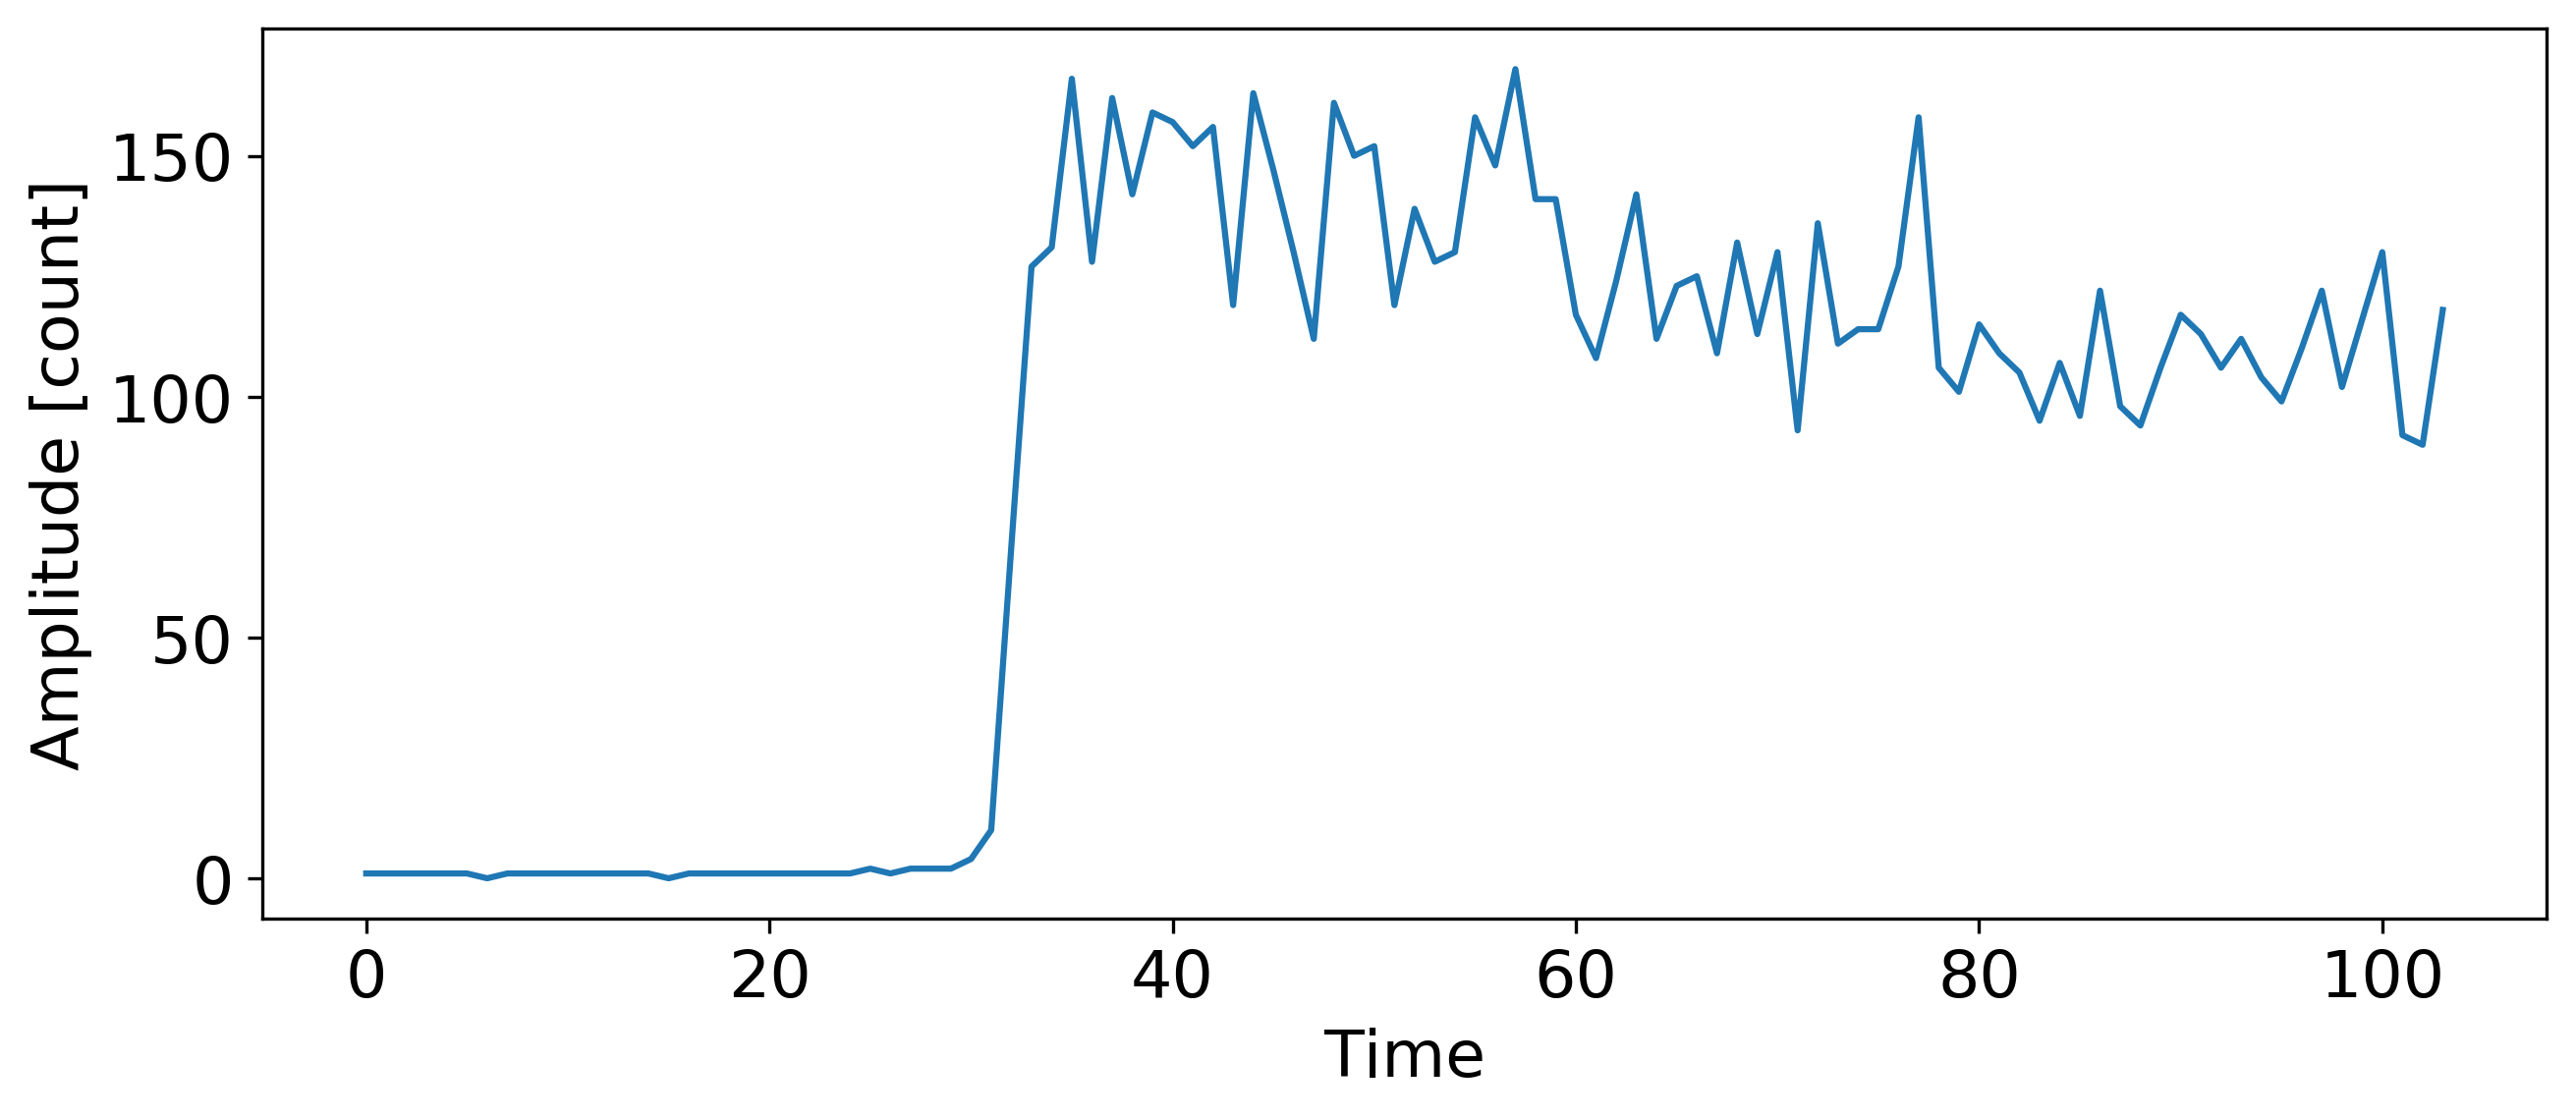

In [6]:
#try and look for waveforms at different indexes (first index is the array at 1Hz, second is the index within the 20Hz array)
#most of the track used is over calm seas (except around 55°S)
input_root = os.path.join(MYPATH,'Jason_test_data')
input_file = 'JA3_GPS_2PdP050_126_20170622_042327_20170622_051940.nc'
my_file    = os.path.join(input_root,input_file)
nc = xr.open_dataset(my_file)

lat_20 = nc.variables['lat_20hz'][:]
lon_20 = nc.variables['lon_20hz'][:]
swh_ku = nc.variables['swh_ku'][:]
wvf_ind= nc.variables['wvf_ind'][:]
waveforms_20hz_ku = nc.variables['waveforms_20hz_ku'][:]
nc.close()

fig = plt.figure(figsize=(10, 4), dpi=300)
plt.plot(wvf_ind, waveforms_20hz_ku[1000,10,:])
plt.xlabel('Time', fontsize=16)
plt.ylabel('Amplitude [count]',  fontsize=16)
plt.show()

For details on what information different parts of the waveform give us, please read: 
    http://www.altimetry.info/radar-altimetry-tutorial/how-altimetry-works/from-radar-pulse-to-altimetry-measurements/5-1-2-3-altimetric-measurements-over-the-ocean/

Now we will make a similar plot for Sentinel-3, SRAL.

SRAL operates in Delay-Doppler (SAR) mode, and therefore the waveform over the ocean will be "peakier" than the conventional LRM one over ocean. However, it also provides a PLRM (pseudo-LRM) product, which uses SAR mode to recreate LRM data (and will look more similar in shape to the J3 waveform). We will also plot this for comparison.

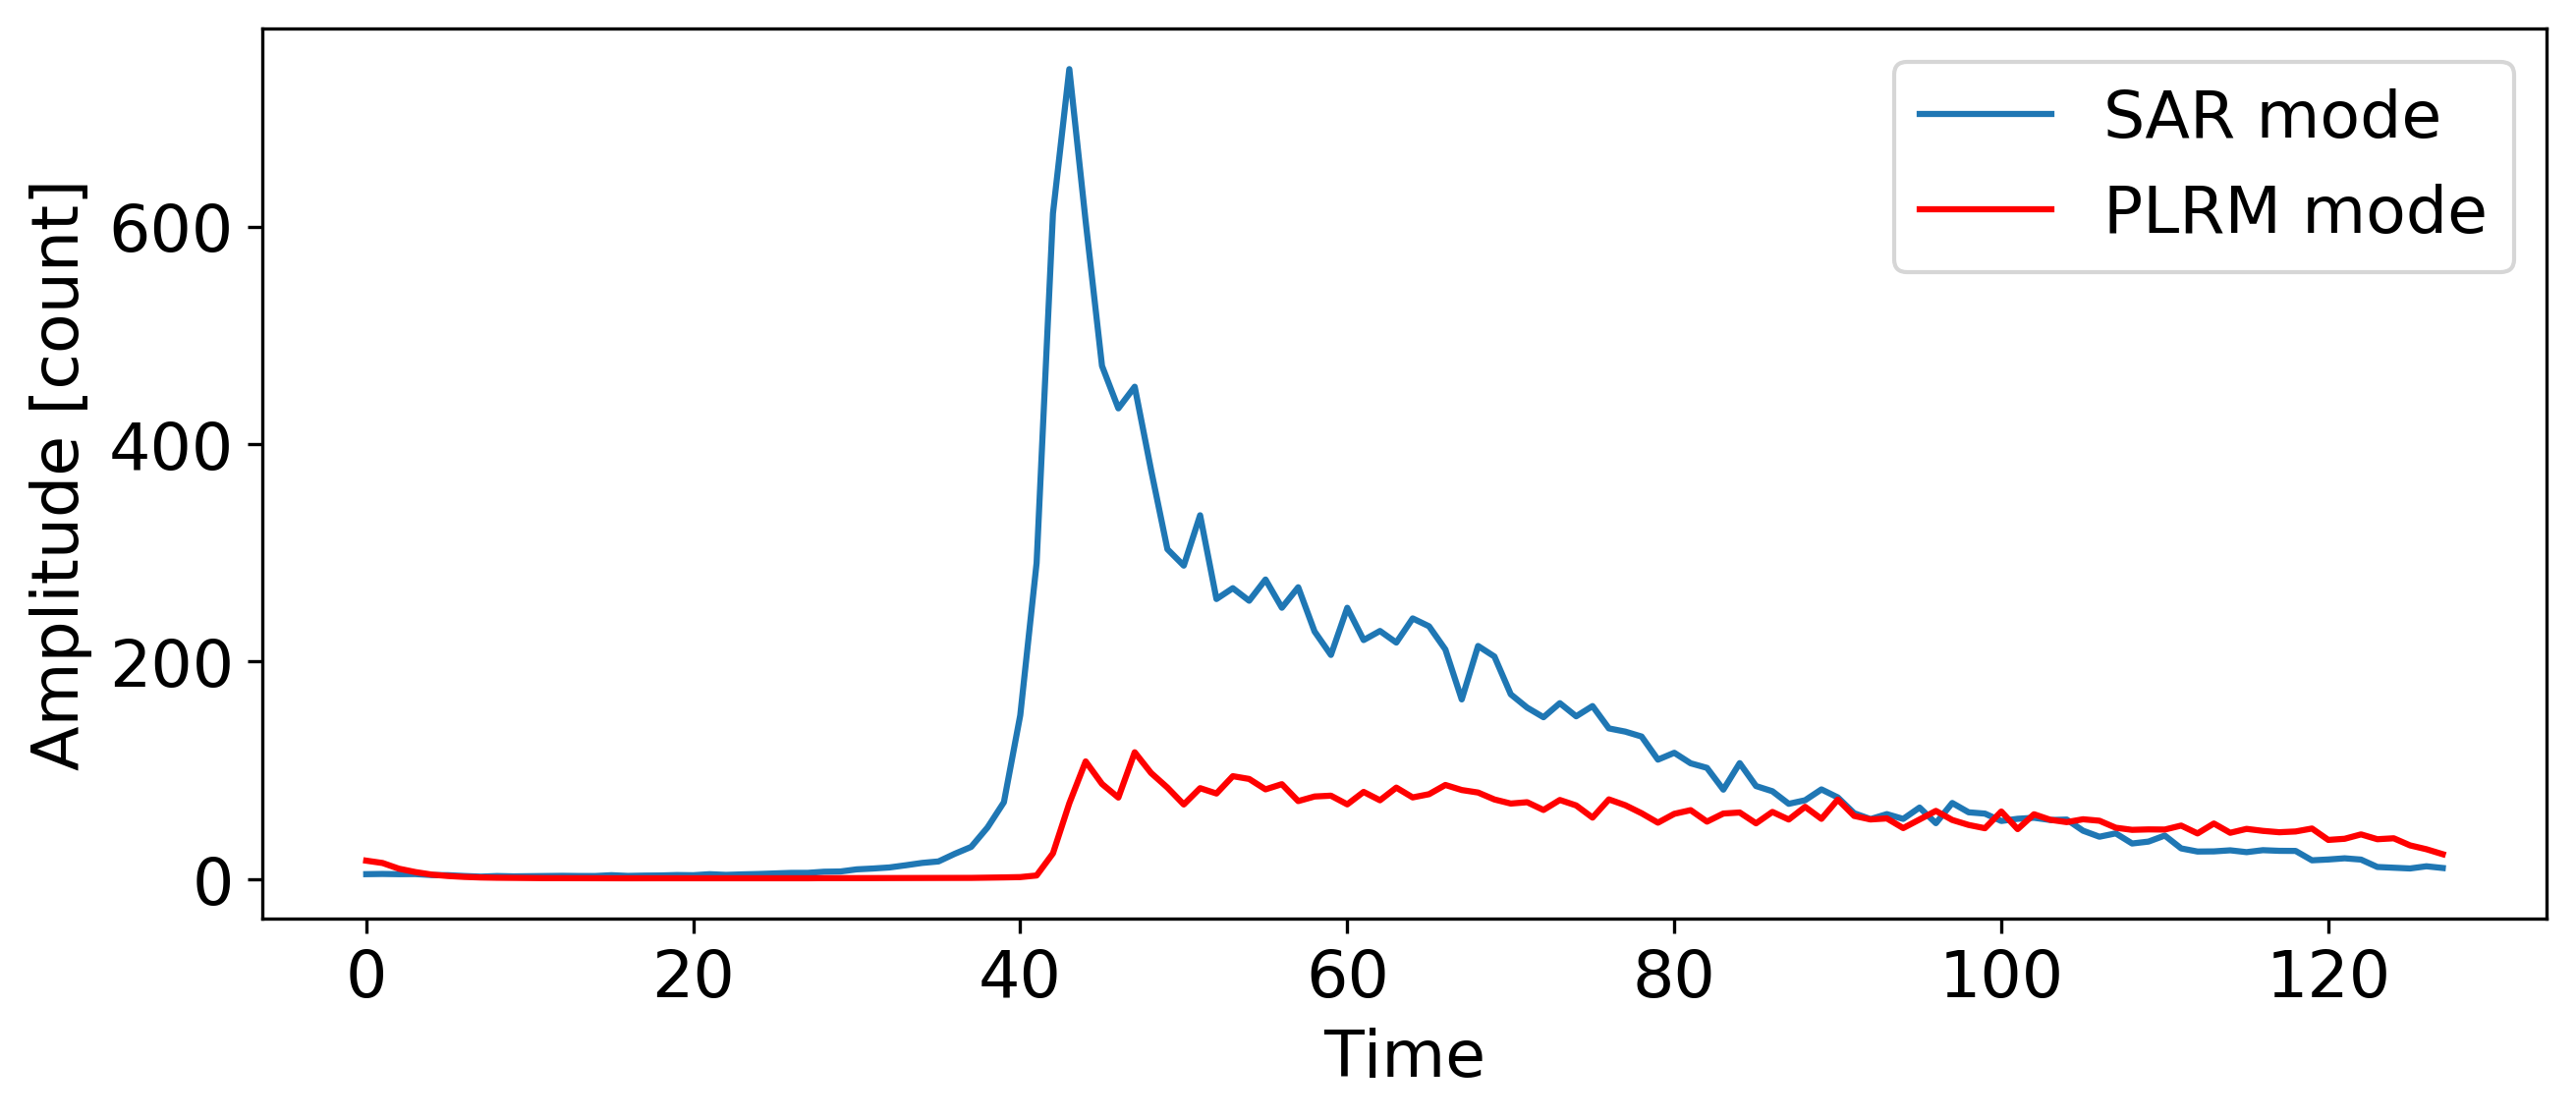

In [7]:
input_root = os.path.join(MYPATH,'sral_data')
input_path = 'S3B_SR_2_WAT____20210601T105631_20210601T114338_20210627T032723_2827_053_094______MAR_O_NT_004.SEN3'
input_file = 'enhanced_measurement.nc'
my_file    = os.path.join(input_root,input_path,input_file)
nc = xr.open_dataset(my_file)

echo_sample_ind = nc.variables['echo_sample_ind'][:]
waveform_20_ku = nc.variables['waveform_20_ku'][:]
waveform_20_plrm_ku = nc.variables['waveform_20_plrm_ku'][:]
nc.close()

fig = plt.figure(figsize=(10, 4), dpi=300)
ax = plt.subplot(1,1,1)
p1, = ax.plot(echo_sample_ind, waveform_20_ku[3000,:], label='SAR mode')
p2, = ax.plot(echo_sample_ind, waveform_20_plrm_ku[3000,:],'r', label='PLRM mode')
plt.xlabel('Time', fontsize=16)
plt.ylabel('Amplitude [count]',  fontsize=16)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels)
plt.savefig('SRAL_waveforms')
plt.show()

### SWH and waveform shapes ###

Lets look at a real-world example of how waveform shape effects one of our key geophysical parameters, significant wave height. Storms crosses the North Atlantic late 2017 / beginning 2018 (as every winter). Lets visualize waveforms inside and outside the storm (presumed to be high and low waves) for SRAL.

2% SWH Ku for the track 1.6301001143455505
98% SWH Ku for the track 14.60898115158081


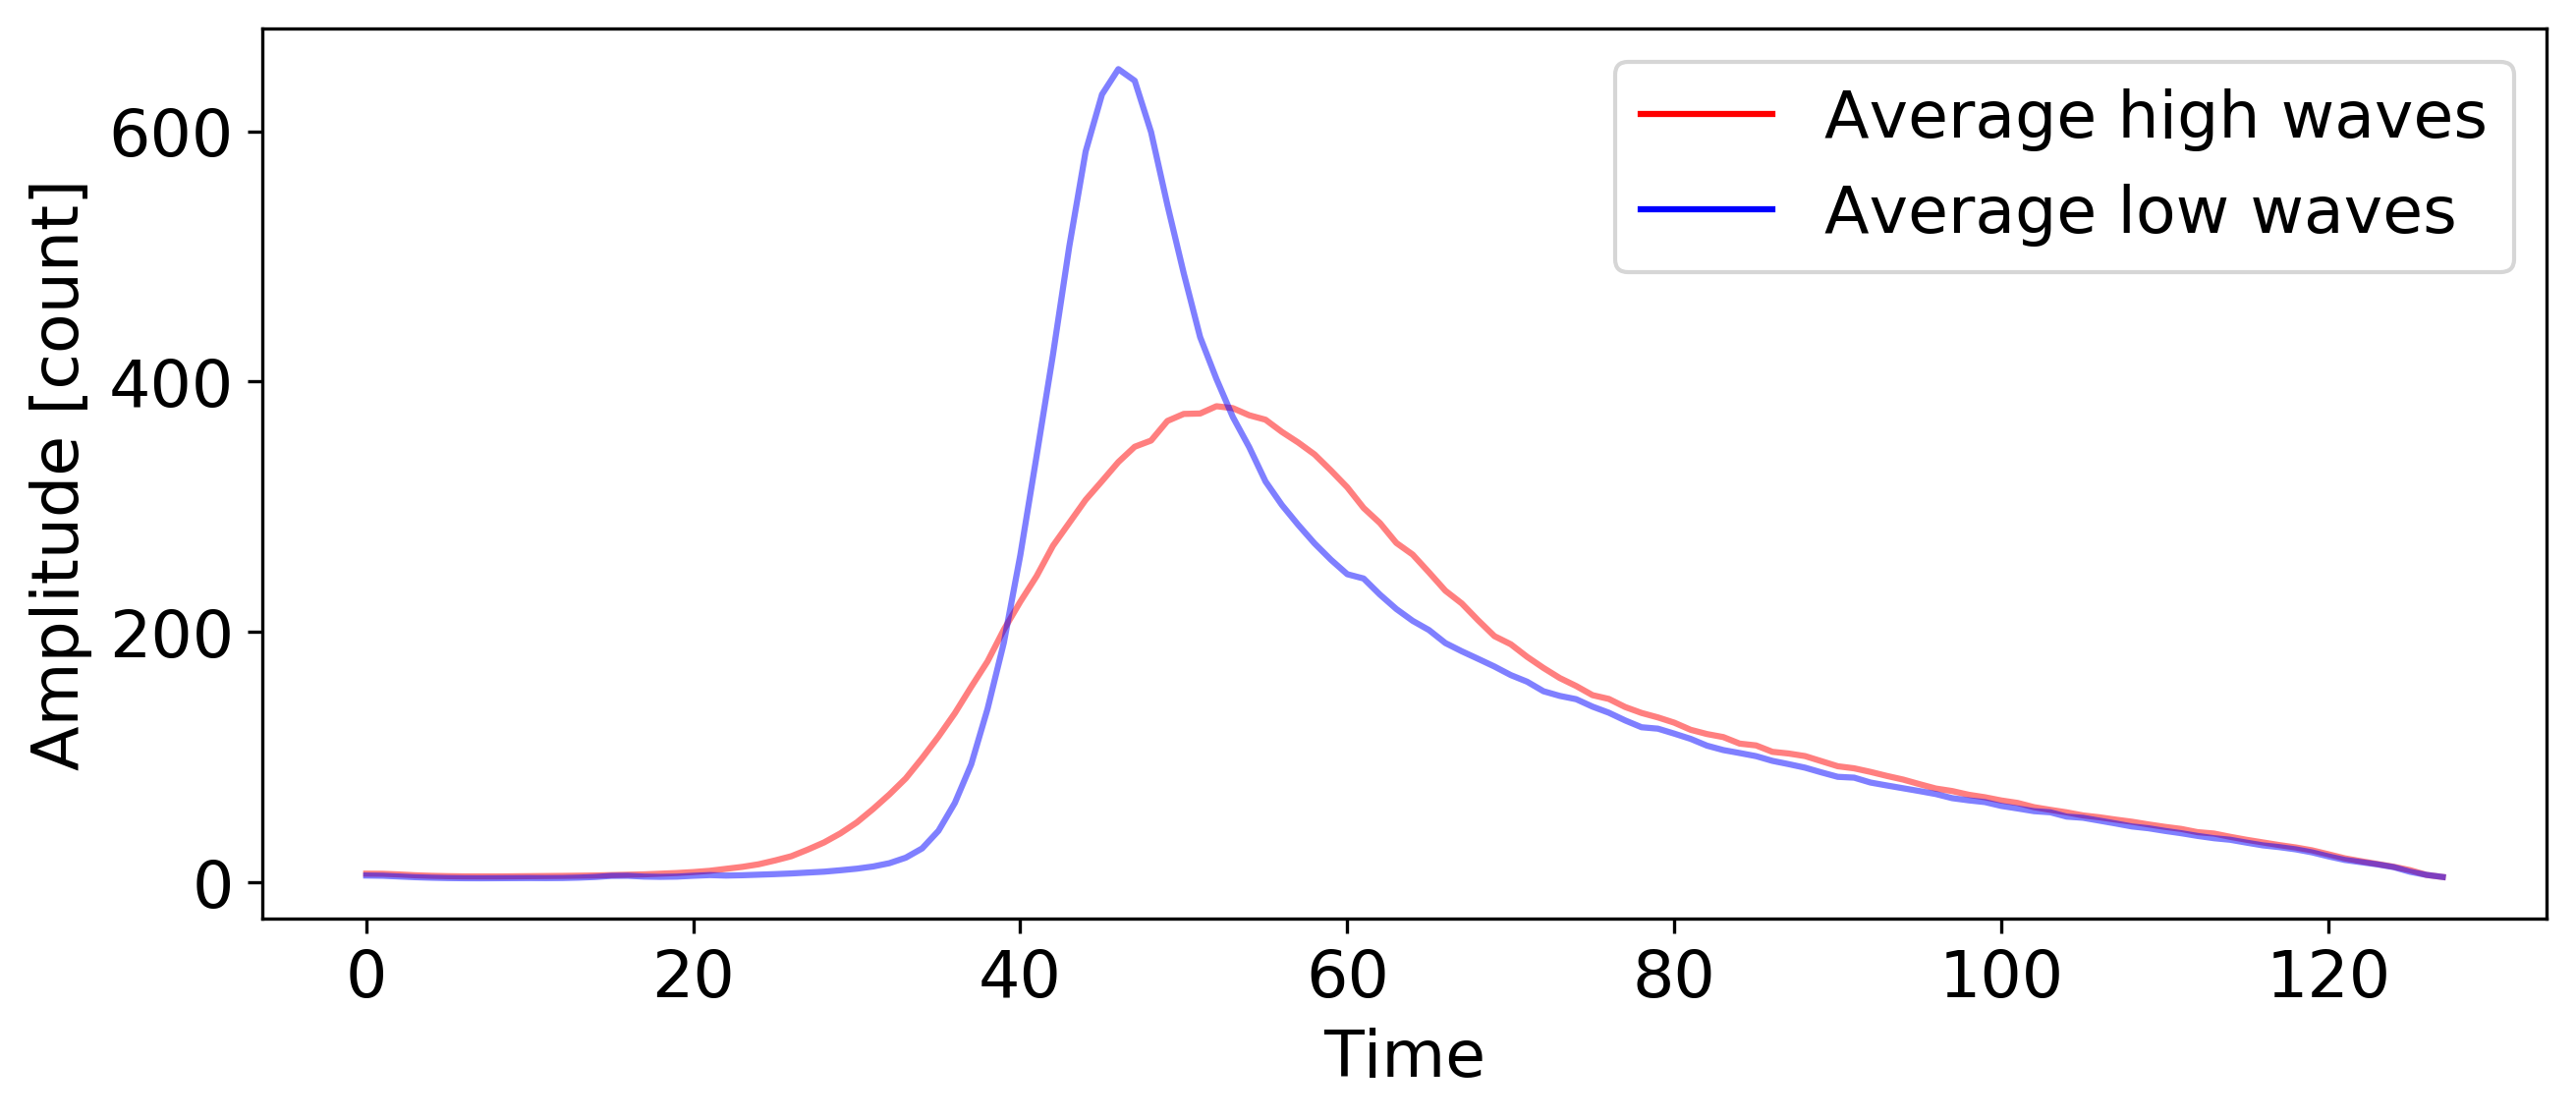

In [8]:
input_root = os.path.join(MYPATH,'sral_data')
input_path = 'S3B_SR_2_WAT____20210601T105631_20210601T114338_20210627T032723_2827_053_094______MAR_O_NT_004.SEN3'
input_file = 'enhanced_measurement.nc'
my_file    = os.path.join(input_root,input_path,input_file)
nc = xr.open_dataset(my_file)

# read the variables
echo_sample_ind = nc.variables['echo_sample_ind'][:]
waveform_20_ku = nc.variables['waveform_20_ku'][:]
swh_ocean_20_ku = nc.variables['swh_ocean_20_ku'][:]
nc.close()

# find the 2% and 98% values of SWH
low_percentage = 2
high_percentage = 100 - low_percentage

SWH_bot = np.percentile(swh_ocean_20_ku[np.isfinite(swh_ocean_20_ku)], low_percentage)
SWH_top = np.percentile(swh_ocean_20_ku[np.isfinite(swh_ocean_20_ku)], high_percentage)

print(str(low_percentage)+'% SWH Ku for the track', SWH_bot)
print(str(high_percentage)+'% SWH Ku for the track', SWH_top)

lowwaves = np.where( swh_ocean_20_ku <= SWH_bot )[0]
highwaves = np.where( swh_ocean_20_ku >= SWH_top )[0]

lowwaves_index=np.asarray(lowwaves).astype(int)
highwaves_index=np.asarray(highwaves).astype(int)

wvf_low = np.nanmean(waveform_20_ku[lowwaves_index][:], axis = 0)
wvf_high = np.nanmean(waveform_20_ku[highwaves_index][:], axis = 0)

fig = plt.figure(figsize=(10, 4), dpi=300)
ax = plt.subplot(1,1,1)
ax.plot(echo_sample_ind,wvf_high,'r', alpha=0.5)
ax.plot(echo_sample_ind,wvf_low,'b', alpha=0.5)

plt.xlabel('Time', fontsize=16)
plt.ylabel('Amplitude [count]',  fontsize=16)

red_line = mlines.Line2D([], [], color='red', label='Average high waves')
blue_line = mlines.Line2D([], [], color='blue', label='Average low waves')

plt.legend(handles=[red_line, blue_line])
plt.savefig('SRAL_waveforms_storm')
plt.show()

The significant wave height is obtained by analyzing the shape and intensity of the altimeter radar beam reflected from the sea surface (radar echo). A long time delay in the return signal indicates that waves are high and, conversely, a short delay indicates that the sea surface is calm.

<br> <a href="./4_SRAL_SLAs.ipynb"><< 4 - SRAL Sea-level anomalies </a><span style="float:right;"><a href="SRAL_overview.ipynb">Back to SRAL overview >></a> 
    
   <a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>